<a href="https://colab.research.google.com/github/jpirolla/AM/blob/main/teoria_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similaridade de Jaccard (ou índice de Jaccard) 

### O que é? 
Trata-se de uma medida estatística utilizada para calcular a similaridade entre dois conjuntos de dados. 

Matematicamente, define-se o indice de Jaccard como a razão da cardinalidade da intersecção ela união dos dois conjuntos em questão, ou seja:

$$ J_{A,B} = \frac{|A \cap B|}{|A\cup B|} = \frac{|A \cap B|}{|A| + |B| - |A\cup B|}$$ 

Note que temos 3 possíveis casos: 
1. Se ambos os conjuntos fores identicos, $J_{A,B}=1$.
2. Se ambos forem disjuntos, segue que $J_{A,B}=0$.
3. Se houver elementos em comum, temos então que a similaridade de Jaccard é um valor entre 0 e 1, ou seja, $0<J_{A,B}<1$.


### Aplicações
As medidas de similaridade de Jaccard podem ser utilizadas desde aplicações simples em semelhanças de conjuntos (sets) a semelhança de textos complexos 

# Distância de Jaccard 

### Qual a diferença entre a similaridade e distância de Jaccard? 

Nota-se que a similaridade, como o proprio nome diz, remete o quão similares ambos os conjuntos analisados são. Em contra partida, a **distância** nos fornece o quão _dissimilares_ os dois conjuntos são.

Matematicamente, dizemos que tal medida é obtida através da razão da diferença entre a união do conjunto e a interseção do conjunto sobre a união do conjunto, ou seja, 


$$ d_J = \frac{|A\cup B| - |A \cap B|}{|A\cup B|} = 1-J_{A,B}.$$

Tal como anteriormente, temos 3 casos possíveis: 

1. Se ambos os conjuntos fores identicos, $d_J=0$.
2. Se ambos forem disjuntos, segue que $d_J=1$.
3. Se houver elementos em comum, temos então que a similaridade de Jaccard é um valor entre 0 e 1, ou seja, $0<d_J<1$.

# Similaridade e distância de atributos binários assimétricos

### O que é um atributo binário? 
Dizemos que um atributo binário é aquele que é descrito por 2 únicas possibilidades: 
- **0** se um atributo **não está presente**;
- **1** se um atributo **está presente**.

### E qual é a assimetria desses atributos? 

A assimetria associada decorre de **como ponderamos** tais situações. A presença de atributos 1 é considerada 'mais importante' que a ausência dela, ou seja, 0. 

#### Matematicamente 
- **Similaridade de Jaccard**: 

$$ J = \frac{M_{11}}{M_{01} + M_{10} + M_{11}}$$

- **Distância de Jaccard**: 

$$ J = \frac{M_{01} + M_{10}}{M_{01} + M_{10} + M_{11}} = 1-J$$

#### Notação 

- $M_{11}$ é o número total de atributos em que **A e B têm 1**; 

- $M_{01}$ é o número total de atributos, para os quais **A tem 0** e **B tem 1**;
- $M_{10}$ é o número total de atributos nos quais **A tem 1** e **B tem 0**;
- $M_{00}$ é o número total de atributos para os quais **A e B têm 0**.
- Os N atributos são resultado da soma de todos os casos acima. 


#### Exemplo: 

Suponha uma loja que possui 6 produtos (atributos) e 2 clientes (objetos). 

- Cliente A comprou: maçã, café com leite
- Cliente B comprou: ovos, leite, café

|	-- |Apple |Tomato| Eggs|	Milk	|Coffee	| Sugar
|--- |----- |----- |--- |--- |--- |--- |
| A  |	1 |	0 |	0 |	1 |	1	 |1 |
B	| 0 |	0 |	1 |	1 |	1 |	0 |

| --| Quantidade | explicação
|--- |----- |----- 
M11 |	2|		Both customers bought coffee and milk
M01 |		1|		Customer A didn’t buy eggs, whereas Customer B bought eggs
M10 |	2	 |Customer B didn’t buy apple and sugar, whereas Customer 1 bought apple and sugar
M00	 |1	 | Neither of customers bought tomato

**Similaridade Jaccard**
$$J=\frac{M_{11}}{M_{01}+M_{10}+M_{11}}=\frac{2}{1+2+2}=\frac{2}{5}=0.4$$

**Distância Jaccard**
$$d_J=\frac{M_{01}+M_{01}}{M_{01}+M_{10}+M_{11}}=\frac{1+2}{1+2+2}=\frac{3}{5}=0.6$$
Que corresponde fazer:
$$d_J= 1 - J_{A,B} = 1-0,4=0,6$$

# Codigo - Calculando Jaccard na mão

In [ ]:
import numpy as np
import scipy 
import sklearn

In [ ]:
# Seja dois conjuntos 
A = {1, 2, 3, 5, 7}
B = {1, 2, 4, 8, 9}

In [ ]:
def jaccard_similarity(A, B):
    #Find intersection of two sets
    nominator = A.intersection(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    similarity = len(nominator)/len(denominator)
    
    return similarity

def main():
  print(jaccard_similarity(A, B))
  
if (__name__ == '__main__'):
    main()

0.25


# Codigo - Calculando distância Jaccard na mão

In [ ]:
def jaccard_distance(A, B):
    #Find symmetric difference of two sets
    nominator = A.symmetric_difference(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    distance = len(nominator)/len(denominator)
    
    return distance
    
def main():
  print(jaccard_distance(A, B))
  
if (__name__ == '__main__'):
    main()

0.75


In [ ]:
# ou 
def jaccard_dist(A,B):
  return (1-similarity)

def main(): 
  print(jaccard_dist)
def main():
  print(jaccard_dist(A,B))
  
if (__name__ == '__main__'):
    main()

0.75


# Calculando a similaridade e a distância Jaccard para um atributo binário assimétrico


In [ ]:
import numpy as np
from scipy.spatial.distance import jaccard
from sklearn.metrics import jaccard_score

In [ ]:
# Com o exemplo do mercado 
A = np.array([1,0,0,1,1,1])
B = np.array([0,0,1,1,1,0])

In [ ]:
similarity = jaccard_score(A, B)
distance = jaccard(A, B)

print(f'Jaccard similarity is equal to: {similarity}')
print(f'Jaccard distance is equal to: {distance}')

Jaccard similarity is equal to: 0.4
Jaccard distance is equal to: 0.6


# Refazendo Flags 


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files 
import io 
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
import seaborn as sns #importando o tema para visualização 
from google.colab import drive
from scipy.spatial import distance

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Dataframe completo
df = pd.read_csv('/content/drive/My Drive/IC/datasets/8-7L-flags.csv', sep=',')
display(df)

,landmass,zone,area,population,language,religion,bars,stripes,colours,circles,...,icon,animate,text,red,green,blue,yellow,white,black,orange
0,5,1,648,16,10,2,0,3,5,0,...,1,0,0,1,1,0,1,1,1,0
1,3,1,29,3,6,6,0,0,3,0,...,0,1,0,1,0,0,1,0,1,0
2,4,1,2388,20,8,2,2,0,3,0,...,0,0,0,1,1,0,0,1,0,0
3,6,3,0,0,1,1,0,0,5,0,...,1,1,0,1,0,1,1,1,0,1
4,3,1,0,0,6,0,3,0,3,0,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,6,3,3,0,1,1,0,0,3,0,...,0,0,0,1,0,1,0,1,0,0
190,3,1,256,22,6,6,0,3,4,0,...,0,0,0,1,0,1,1,1,0,0
191,4,2,905,28,10,5,0,0,4,1,...,1,1,0,1,1,0,1,0,0,1
192,4,2,753,6,10,5,3,0,4,0,...,0,1,0,1,1,0,0,0,1,1


In [7]:
M = df[['red', 'green', 'blue', 'yellow', 'white', 'black', 'orange']]
display(M)

,red,green,blue,yellow,white,black,orange
0,1,1,0,1,1,1,0
1,1,0,0,1,0,1,0
2,1,1,0,0,1,0,0
3,1,0,1,1,1,0,1
4,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...
189,1,0,1,0,1,0,0
190,1,0,1,1,1,0,0
191,1,1,0,1,0,0,1
192,1,1,0,0,0,1,1


In [8]:
# transpondo a matriz
M_t = np.array(M).T
display(M_t)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
import seaborn as sns #importando o tema para visualização 

## Jaccard

In [ ]:
def calc_matriz_distancia_jaccard(M_t):
  np.set_printoptions(precision=3)
  distance_matrix = pairwise_distances(M_t, metric=jaccard_score)
  return distance_matrix

def main():
  M_t = np.array(M).T
  print(calc_matriz_distancia_jaccard(M_t))

if (__name__ == '__main__'):
    main()

[[1.    0.427 0.385 0.444 0.616 0.289 0.119]
 [0.427 1.    0.203 0.4   0.362 0.254 0.206]
 [0.385 0.203 1.    0.338 0.551 0.119 0.147]
 [0.444 0.4   0.338 1.    0.267 0.324 0.147]
 [0.616 0.362 0.551 0.267 1.    0.207 0.147]
 [0.289 0.254 0.119 0.324 0.207 1.    0.083]
 [0.119 0.206 0.147 0.147 0.147 0.083 1.   ]]


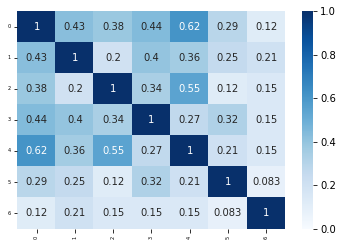

In [56]:
# Gerando o heatmap
distance_matrix = pairwise_distances(M_t, metric=jaccard_score)
ax = sns.heatmap(distance_matrix, annot=True, vmin=0, vmax=1, cmap="Blues", cbar=True, xticklabels=True, yticklabels=True)

# Configurando
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 5)

figure = ax.get_figure()

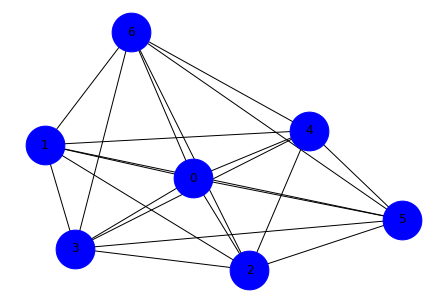

In [51]:
# Grafo completo sem self loop
G = nx.from_numpy_matrix(distance_matrix)
list(nx.selfloop_edges(G))
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G, with_labels=True, node_color='blue', node_size = 1500) 
plt.show()

## Rogers Tanimoto

In [13]:
def calc_matriz_distancia_rogers(M_t):
  np.set_printoptions(precision=3)
  distance_matrix_rogers= pairwise_distances(M_t, metric='rogerstanimoto')
  return distance_matrix_rogers

def main():
  M_t = np.array(M).T
  print(calc_matriz_distancia_rogers(M_t))

if (__name__ == '__main__'):
    main()

[[0.    0.671 0.732 0.653 0.536 0.736 0.842]
 [0.671 0.    0.787 0.574 0.728 0.609 0.568]
 [0.732 0.787 0.    0.653 0.536 0.76  0.648]
 [0.653 0.574 0.653 0.    0.828 0.547 0.619]
 [0.536 0.728 0.536 0.828 0.    0.802 0.795]
 [0.736 0.609 0.76  0.547 0.802 0.    0.508]
 [0.842 0.568 0.648 0.619 0.795 0.508 0.   ]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


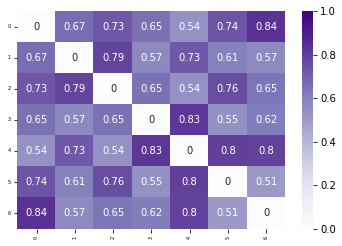

In [55]:
# Gerando o heatmap
distance_matrix_rogers = pairwise_distances(M_t, metric='rogerstanimoto')
ax2 = sns.heatmap(distance_matrix_rogers, annot=True, vmin=0, vmax=1, cmap='Purples', cbar=True, xticklabels=True, yticklabels=True)

# Configurando
ax2.set_yticklabels(ax2.get_yticklabels(), rotation = 0, fontsize = 5)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90, fontsize = 5)

figure = ax2.get_figure()

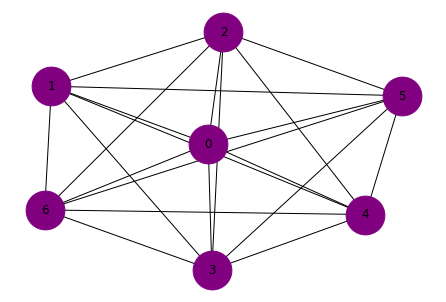

In [54]:
# Grafo completo sem self loop
G_rogers = nx.from_numpy_matrix(distance_matrix_rogers)
list(nx.selfloop_edges(G_rogers))
G_rogers.remove_edges_from(nx.selfloop_edges(G_rogers))
nx.draw(G_rogers, with_labels=True, node_color='purple', node_size = 1500) 
plt.show()

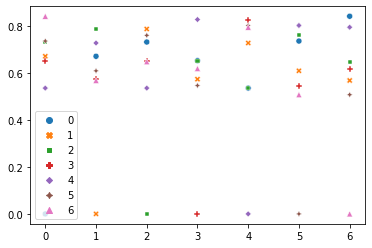

In [60]:
sns.scatterplot(data=distance_matrix_rogers)
plt.show()

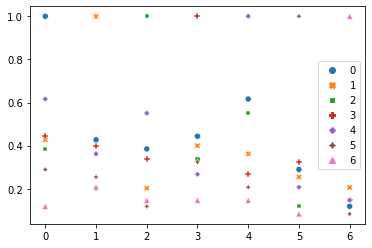

In [61]:
sns.scatterplot(data=distance_matrix)
plt.show()

## Esparsificação 